# Visuailzation of Numerical and Categorical Features with respect to Price
Author: Marie Bouvard

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

# **Data Pre-Processing**
# Loading and displaying the data

In [4]:
data = pd.read_csv('./Data/AB_NYC_2019.csv')

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Removing Null values
We will now check if we have null values in the dataset.

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [68]:
data.drop(['id','host_name','last_review', 'name', 'host_id'], axis=1, inplace=True)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [71]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We have now dropped or filled all of the null values from the dataset, we can start the visualization.

# **Data Visualization**
# Price and Numerical Features

We start by looking at the correlation between numerical features. 

The numerical features are:
- Latitude,
- Longitude,
- Listing Price
- Minimum number of nights
- Number of reviews
- Reviews per month
- The host's listing count
- The availability of the listing, in terms of number of days per year

It seems that there is not strong correlations between features, as we have removed redundent features. The price of a listing seems to have little correlation to other numerical features. Note that the correlation was only computed for numercial features. 

/var/folders/04/qc1dqfkn22v0fdtdm_hbt4hh0000gn/T/ipykernel_42480/2096196455.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


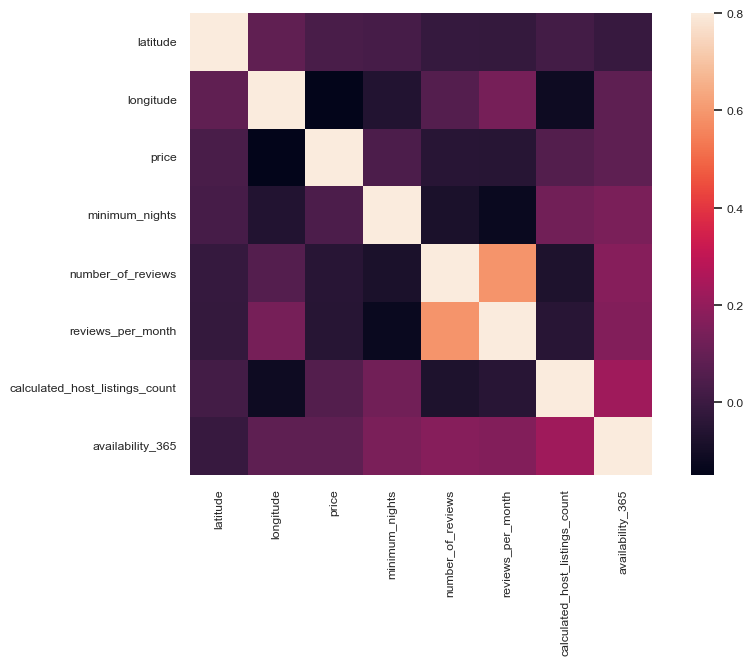

In [70]:
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)

# Price and Categorical Features
The categorical data in this data set are:
- Neighbourhood, 
- Neighbourhood group,
- Room type.
## Listings on a map
Let's visualize the latitude and longitude of the appartments to create a map of the listings, coloured by neighbourhood group.

There are five main neighbourhood groups in the New York area: Brooklyn, Manhattan, Queens, Staten Island and Bronx. 

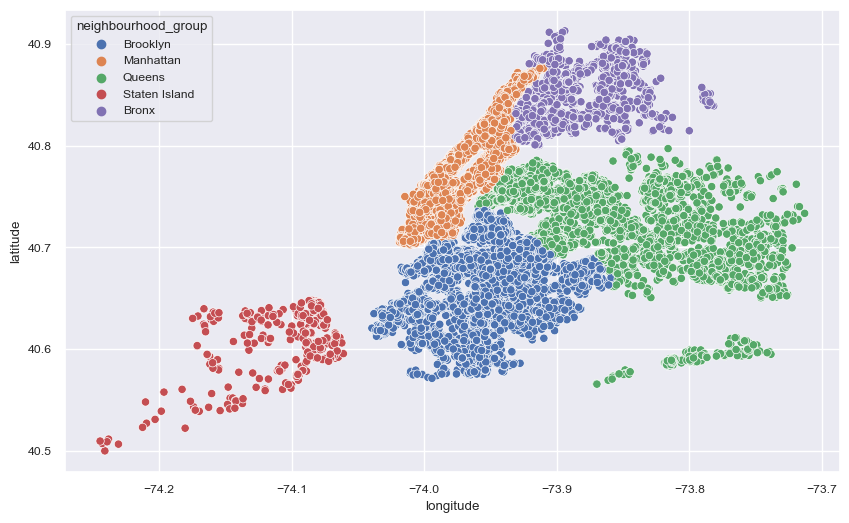

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood_group)
plt.show()

## Price Distribution
Now let's look at the overall price distribution in our data set.

<AxesSubplot: xlabel='Cost per night (US$)'>

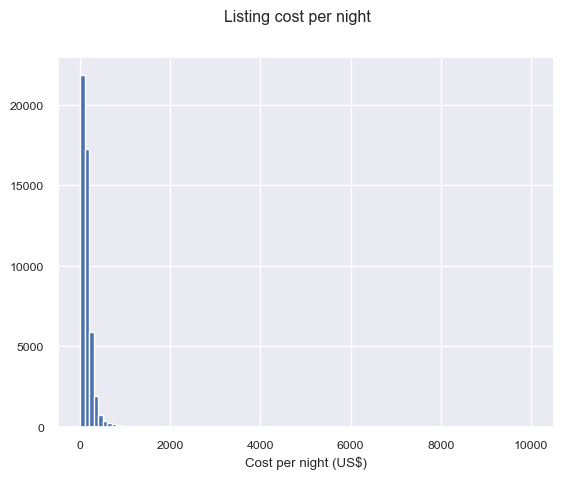

In [113]:
plt.suptitle("Listing cost per night")
plt.xlabel('Cost per night (US$)')
data['price'].hist(bins=100)

This plot is hard to interpret because of the great variation in amount of listings between listings cheaper than approximately $400 and those more expensive than that. 

We will look more separately at these two listing categories.

In [117]:
# Separating listing costing under and over $400 a night
df_under_400 = data[data['price'] <= 400]
df_over_400 = data[data['price'] > 400]
print(f'There are {len(df_over_400)} listings costing over $400 a night among our {len(data)} listings.')

There are 1763 listings costing over $400 a night among our 48895 listings.


### Price distribution for listings under $400 a night

<AxesSubplot: xlabel='Cost per night (US$)'>

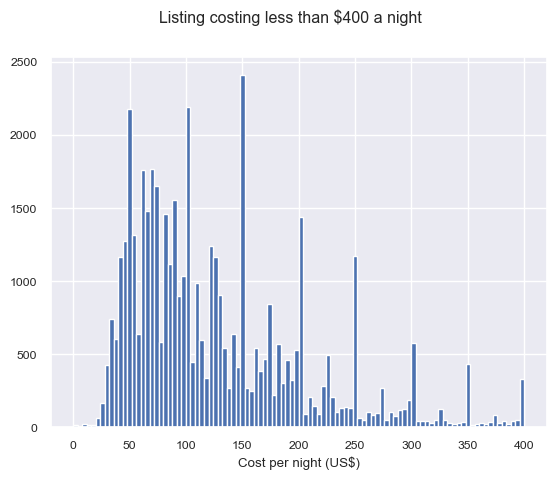

In [114]:
plt.suptitle("Listing costing less than $400 a night")
plt.xlabel('Cost per night (US$)')
df_under_400['price'].hist(bins=100)

### Price distribution for listings over $400 a night

<AxesSubplot: xlabel='Cost per night (US$)'>

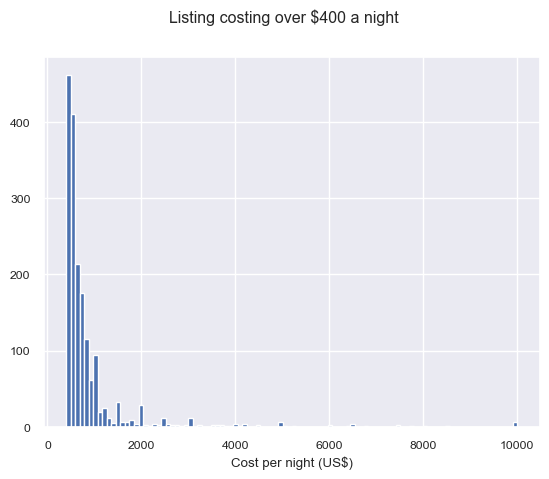

In [115]:
plt.suptitle("Listing costing over $400 a night")
plt.xlabel('Cost per night (US$)')
df_over_400['price'].hist(bins=100)

Clearly, there are important variations of price withtin the listing. 

Since our goal is to predict the price of a listing, we will now focus on the distibution of price in our data set and the link between the price of a listing and our categorical data. 

Only 1,763 out of our 48,895 listings cost over US$400 per night, so we will be plotting separetly listings costing over US$400 for ease of representation.


In [105]:
# Separating listing costing under and over $400 a night
df_under_400 = data[data['price'] <= 400]
df_over_400 = data[data['price'] > 400]
print(f'There are {len(df_over_400)} listings costing over $400 a night within our {len(data)} listings')

There are 1763 listings costing over $400 a night within our 48895 listings


## Price variation map per neighbourhood group 
### Listings under $400 a night

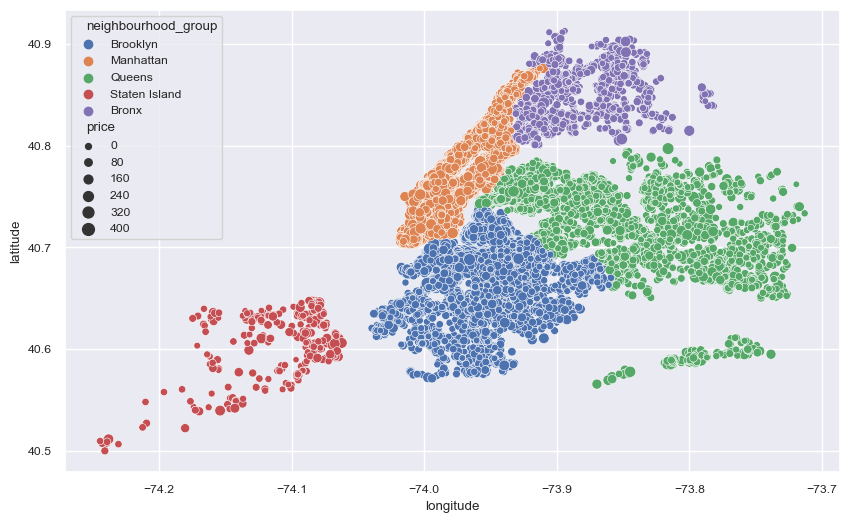

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_under_400.longitude,y=df_under_400.latitude,hue=df_under_400.neighbourhood_group, size=df_under_400.price)
plt.show()

It looks like every neighborhood group has numerous listings costing under $400 a night. We can aslo see that the listings in or close to Manhattan are overall more expensive. 

Let's now take a look at more expensive listings.

### Listings over $400 a night

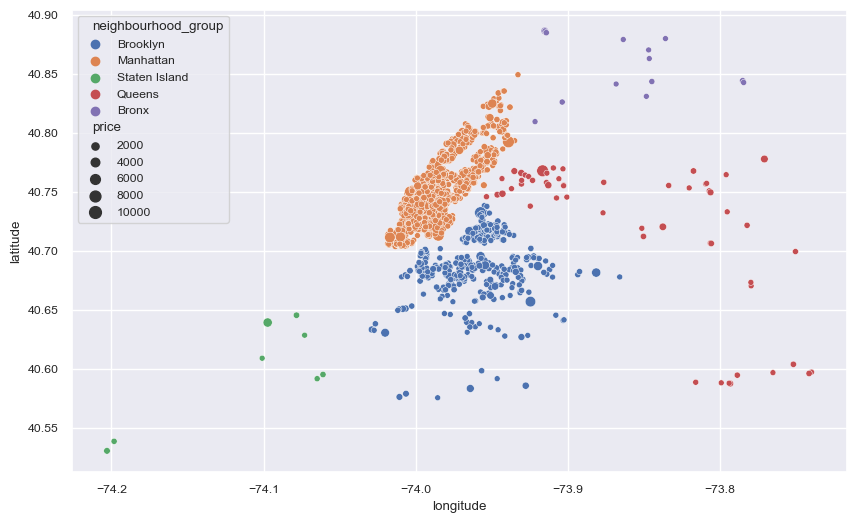

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_over_400.longitude,y=df_over_400.latitude,hue=df_over_400.neighbourhood_group, size=df_over_400.price)
plt.show()

The number of listings on the map has decreased significantly. Very little listings are left for Staten Island, Queens and Bronx. 


A good amount of listings in this price range are located in Brooklyn but most of them are situated in Manhattan. 

We will now look at listing costing over $1000 a night to confirm this trend.

### Listings over $1000 a night

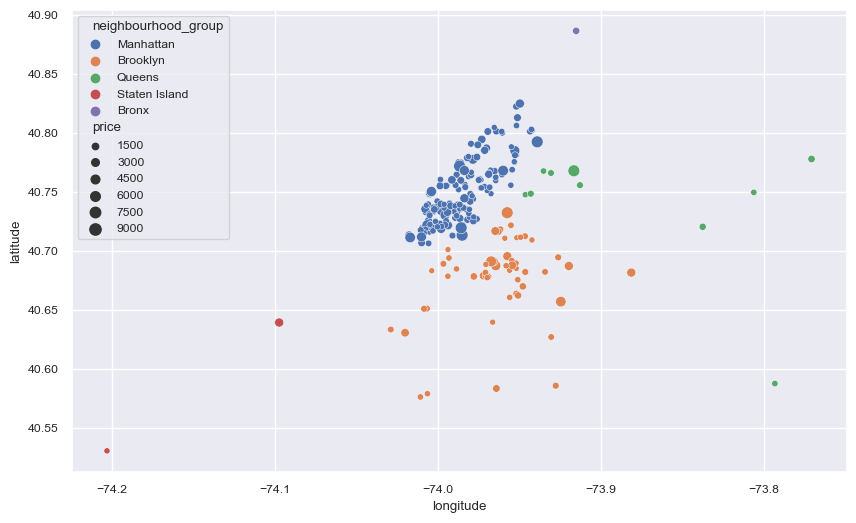

In [141]:
df_over_1000 = data[data['price'] > 1000]
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_over_1000.longitude,y=df_over_1000.latitude,hue=df_over_1000.neighbourhood_group, size=df_over_1000.price)
plt.show()

At this price range, there are two listings left in Staten Island and one in the Bronx. Most listing left are either in or close to Manhattan. 

It seems that being close to Downtown Manhattan is could be correlated to higher price per night.

## Neighbourhood group vs. Price

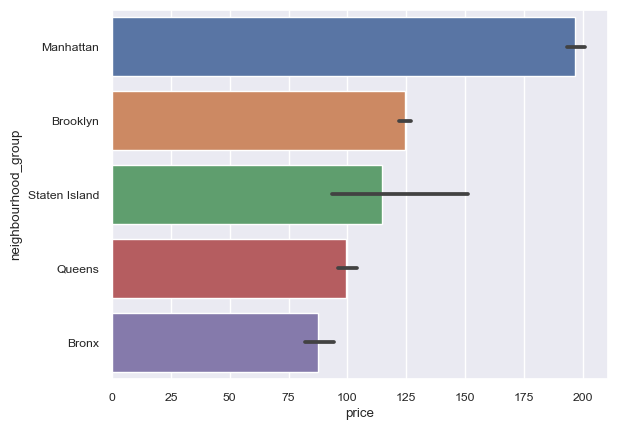

In [129]:
result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)
sns.barplot(x="price", y='neighbourhood_group', data=data, order=result['neighbourhood_group']) 
plt.show()

As expected from our previous data analysis, the neighborhood group with overall higher prices in Manhattan, followed by Brooklyn. 

The less expensive neighbourhoods are Queens and the Bronx. 

We will now look at the mean price per neighbourhood.

## 15 Neighbourhoods with highest mean price

In [99]:
result = data.groupby(["neighbourhood", 'neighbourhood_group'])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending = False)
r = result.head(15)

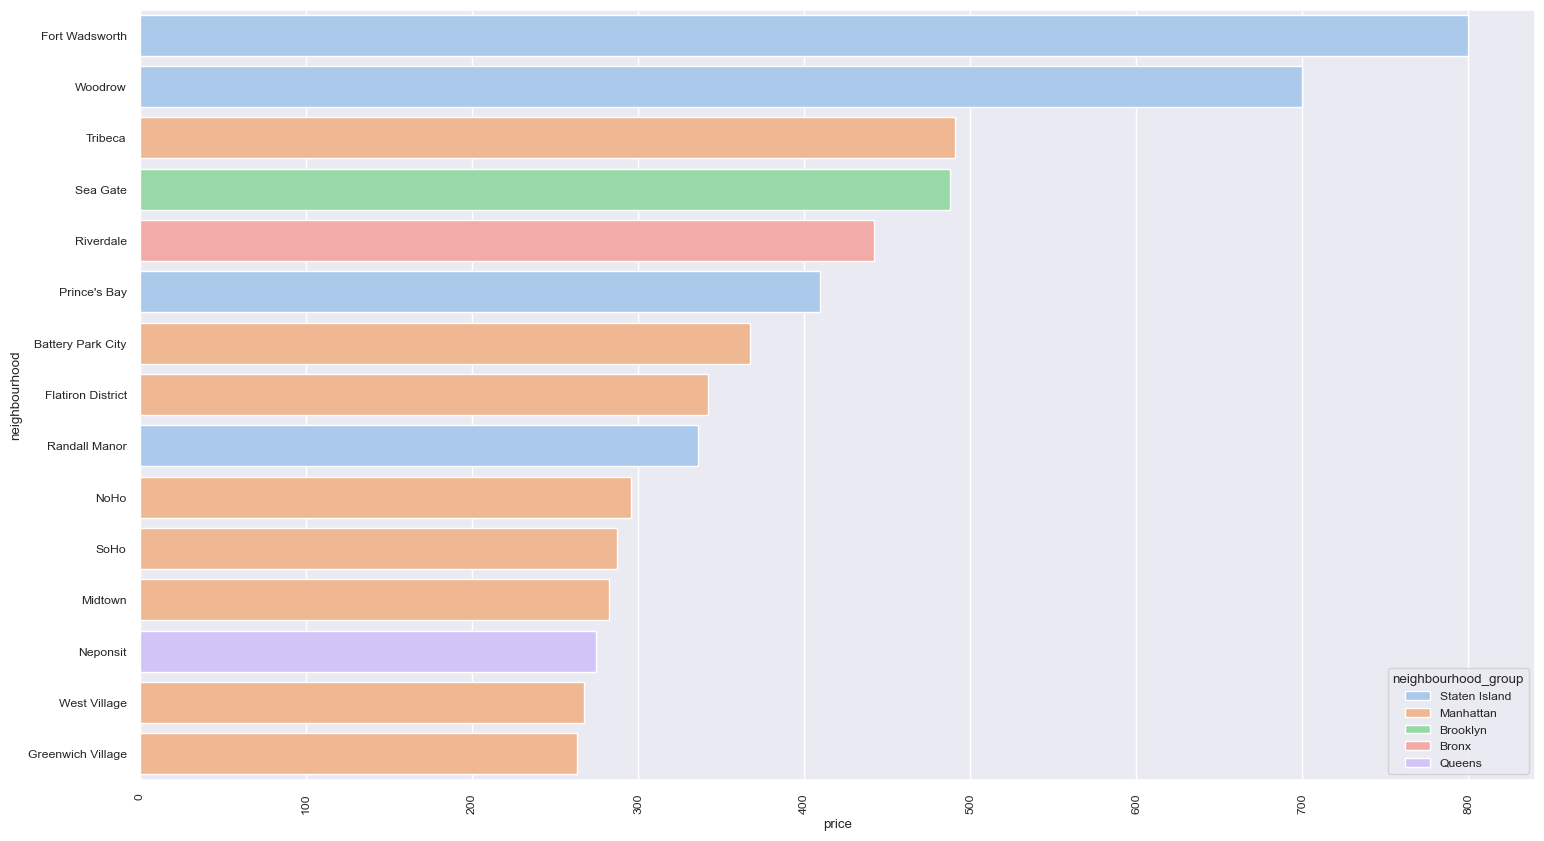

In [100]:
plt.figure(figsize=(18,10))
sns.barplot(x=r.price, y=r.neighbourhood, data=r, hue=r.neighbourhood_group,dodge=False, palette="pastel")
plt.xticks(rotation=90)
plt.show()

Surprisingly, the two most expensive neighbourhoods are not located in Manhattan but in Staten Island. 

Eight of the fifteen most expensive neighbourhood, however are located in Manhattan, four in Staten Island, one in Brooklyn, one in the Bronx and one in Queens. 

Now, we will look at the relation of the room type with the price.

## Room Type vs. Price

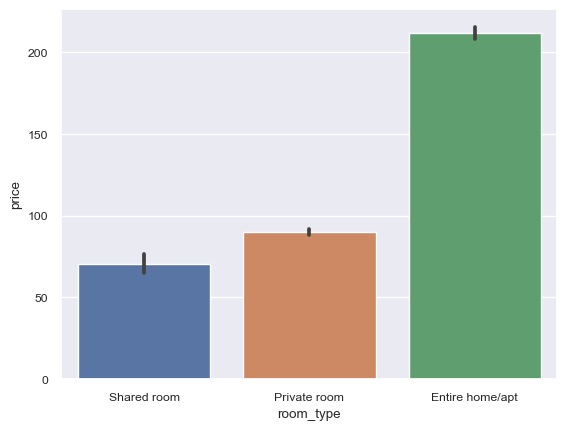

In [8]:
result = data.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=data, order=result['room_type']) 
plt.show()

Unsurprisingly, entire home or apartments are the most expensive room type, followed by private rooms and finally shared rooms.

## Neighbourhood group and Room Type vs. Price

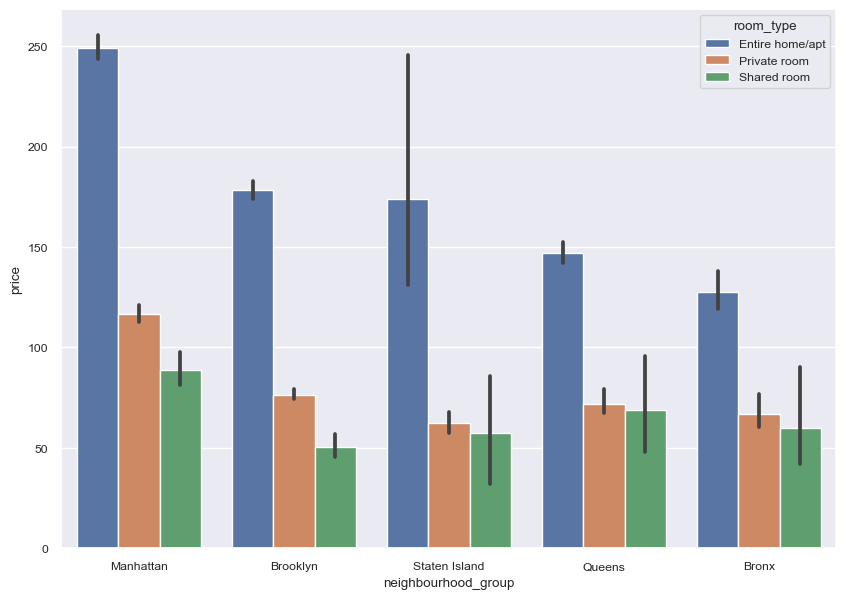

In [128]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", 
            y = "price", 
            hue = "room_type", 
            data = data, 
            hue_order=['Entire home/apt','Private room', 'Shared room'],
            order=['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx'])
plt.show()